In [1]:
pip install citypy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement citypy (from versions: none)
ERROR: No matching distribution found for citypy


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import pandas as pd
import numpy as np
import json
import requests
import random as rand
import matplotlib.pyplot as plt
from citipy import citipy
from scipy.stats import linregress

from api_keys import weather_api_key

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
#lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
city_data = {
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
}

print('Beginning Data Retrieval')
print('-----------------------------')


# iterate through cities & add info into a dataframe
for i in range(len(cities)):
    set_no = ((i + 1) // 50) + 1
    query_url = f"{base_url}q={cities[i]}&appid={weather_api_key}&units=imperial"

    try:
        response = requests.get(query_url).json()
        city_data['City'].append(response['name'])
        city_data['Lat'].append(response['coord']['lat'])
        city_data['Lng'].append(response['coord']['lon'])
        city_data['Max Temp'].append(response['main']['temp_max'])
        city_data['Humidity'].append(response['main']['humidity'])
        city_data['Cloudiness'].append(response['clouds']['all'])
        city_data['Wind Speed'].append(response['wind']['speed'])
        city_data['Country'].append(response['sys']['country'])
        city_data['Date'].append(response['dt'])
        print(f"Processing Record {(i + 1) % 50} of Set {set_no} | {cities[i]}")
    except KeyError:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | wagar
City not found. Skipping...
Processing Record 4 of Set 1 | bira
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | wanning
Processing Record 13 of Set 1 | yenagoa
Processing Record 14 of Set 1 | kongolo
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | belmonte
Processing Record 17 of Set 1 | krasnoselkup
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | moron
Processing Record 23 of Set 1 | puerto ayora
Processing Record 24 of Set

Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | baia
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 5 | boali
City not found. Skipping...
Processing Record 11 of Set 5 | tuatapere
Processing Record 12 of Set 5 | leningradskaya
Processing Record 13 of Set 5 | tangara
Processing Record 14 of Set 5 | amga
Processing Record 15 of Set 5 | coquimbo
Processing Record 16 of Set 5 | magdagachi
Processing Record 17 of Set 5 | shingu
Processing Record 18 of Set 5 | walvis bay
City not found. Skipping...
Processing Record 20 of Set 5 | acarau
Processing Record 21 of Set 5 | vilyuysk
Processing Record 22 of Set 5 | mahibadhoo
Processing Record 23 of Set 5 | berlevag
Processing Record 24 of Set 5 | bermejo
Processing Record 25 of Set 5 | chuy
Processing Record 26 of Set 5 | innisfail
Processing Record 27 of Set 5 | san vicente
City not found. Skipping...
Processing Record 29 of Set 5 | pavelets
Processing Record 30 of Set 5 | keti banda

Processing Record 14 of Set 9 | molteno
Processing Record 15 of Set 9 | casablanca
Processing Record 16 of Set 9 | port-gentil
Processing Record 17 of Set 9 | kuah
Processing Record 18 of Set 9 | shakawe
Processing Record 19 of Set 9 | jingdezhen
Processing Record 20 of Set 9 | vilhena
Processing Record 21 of Set 9 | balkanabat
Processing Record 22 of Set 9 | provideniya
Processing Record 23 of Set 9 | shahrud
Processing Record 24 of Set 9 | pavilosta
Processing Record 25 of Set 9 | sterling
Processing Record 26 of Set 9 | samur
Processing Record 27 of Set 9 | hingoli
Processing Record 28 of Set 9 | salamanca
Processing Record 29 of Set 9 | shudayag
Processing Record 30 of Set 9 | agadez
Processing Record 31 of Set 9 | longyearbyen
Processing Record 32 of Set 9 | laguna
Processing Record 33 of Set 9 | talnakh
Processing Record 34 of Set 9 | sale
Processing Record 35 of Set 9 | yulara
Processing Record 36 of Set 9 | taksimo
Processing Record 37 of Set 9 | bennettsville
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create dataframe and export to csv
city_df = pd.DataFrame(city_data)
city_df.to_csv('output_data/cities.csv', index=False)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,64.40,68,100,4.70,ZA,1603655086
1,Wagar,16.15,36.20,88.86,32,32,11.74,SD,1603655086
2,Bira,49.00,132.47,34.07,88,0,3.56,RU,1603655086
3,Jamestown,42.10,-79.24,46.00,63,90,10.29,US,1603654935
4,Naze,28.37,129.48,64.40,88,90,3.36,JP,1603655071


In [11]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.870511,20.525182,59.793412,73.029197,58.459854,8.006460,1.603655e+09
std,33.151847,89.363907,22.057226,20.703510,38.443532,5.824732,8.866445e+01
min,-54.800000,-175.200000,-4.000000,11.000000,0.000000,0.360000,1.603655e+09
25%,-5.422500,-57.815000,45.000000,63.000000,20.000000,3.360000,1.603655e+09
50%,21.335000,25.150000,64.400000,78.000000,75.000000,6.420000,1.603655e+09
75%,48.595000,100.587500,77.872500,89.000000,95.250000,11.410000,1.603655e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,39.150000,1.603655e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.

humidity_indices = []

# if maximum humidity is greater than 100, add indices of cities with humidity greater than 100 to list
if city_df['Humidity'].max() > 100:
    # index through the cities
    for i in range(len(city_df.index)):
        # test for humidity level > 100 and append to list
        if city_df['Humidity'][i] > 100:
            humidity_indices.append(i)


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_df.drop(humidity_indices, inplace=False)

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,64.40,68,100,4.70,ZA,1603655086
1,Wagar,16.15,36.20,88.86,32,32,11.74,SD,1603655086
2,Bira,49.00,132.47,34.07,88,0,3.56,RU,1603655086
3,Jamestown,42.10,-79.24,46.00,63,90,10.29,US,1603654935
4,Naze,28.37,129.48,64.40,88,90,3.36,JP,1603655071


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

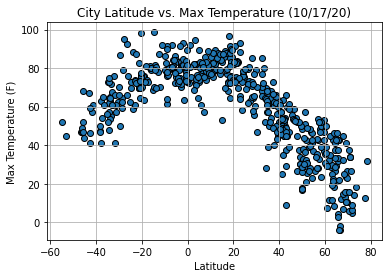

In [15]:
lat = clean_city_data[['Lat']]
temp = clean_city_data[['Max Temp']]

plt.scatter(lat, temp, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig1.png')

plt.show()

## Latitude vs. Humidity Plot

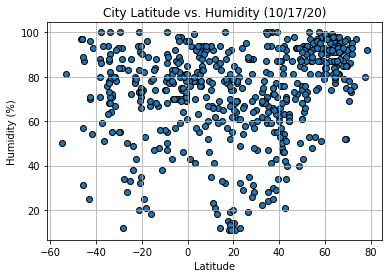

In [16]:
lat = clean_city_data[['Lat']]
hum = clean_city_data[['Humidity']]

plt.scatter(lat, hum, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig2.png')

plt.show()

## Latitude vs. Cloudiness Plot

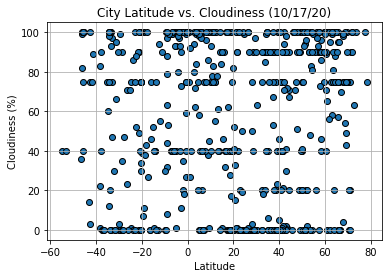

In [17]:
lat = clean_city_data[['Lat']]
cloud = clean_city_data[['Cloudiness']]

plt.scatter(lat, cloud, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig3.png')

plt.show()

## Latitude vs. Wind Speed Plot

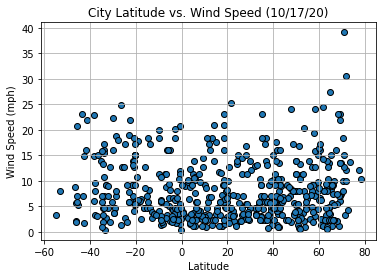

In [18]:
lat = clean_city_data[['Lat']]
wind = clean_city_data[['Wind Speed']]

plt.scatter(lat, wind, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig4.png')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value: -0.8767758161411421


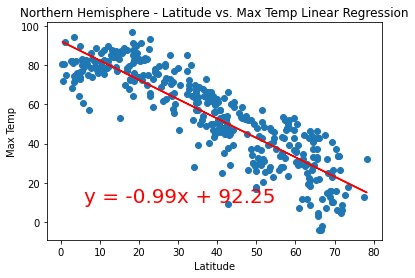

In [50]:
north_hem_df = clean_city_data.loc[clean_city_data['Lat'] > 0]

lat = north_hem_df['Lat']
temp = north_hem_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, temp)
plt.title('Northern Hemisphere - Latitude vs. Max Temp Linear Regression')
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value: 0.7266634138317647


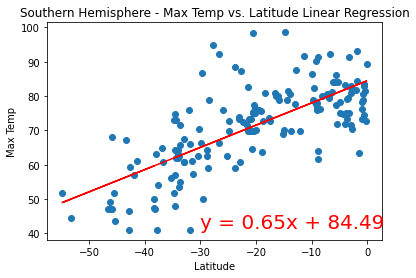

In [49]:
south_hem_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

lat = south_hem_df['Lat']
temp = south_hem_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 50), xycoords = 'figure points', fontsize=20,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value: 0.3166796290353247


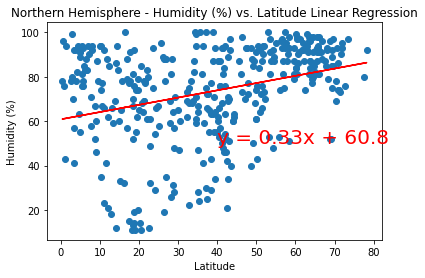

In [48]:
lat = north_hem_df['Lat']
hum = north_hem_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=20,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value: -0.0034212899577298005


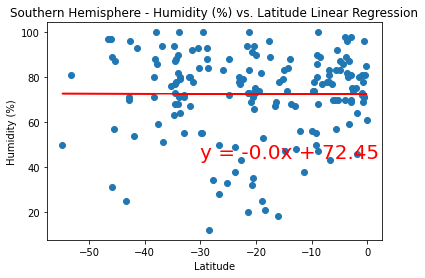

In [53]:
lat = south_hem_df['Lat']
hum = south_hem_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 120), xycoords = 'figure points', fontsize=20,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.12554345285444277


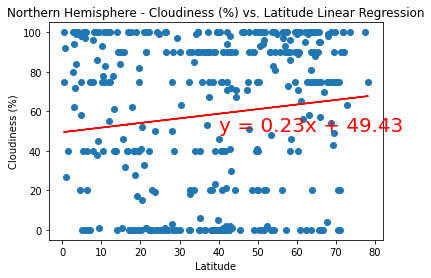

In [54]:
lat = north_hem_df['Lat']
cloud = north_hem_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, cloud)
plt.plot(lat,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(40,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.13490414986367333


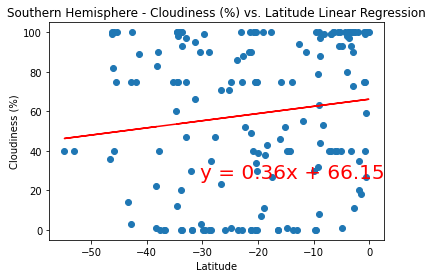

In [55]:
lat = south_hem_df['Lat']
cloud = south_hem_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, cloud)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 100), xycoords = 'figure points', fontsize=20,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: 0.17685421416336017


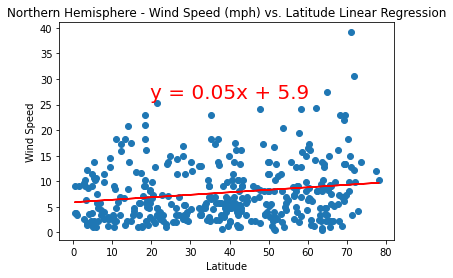

In [56]:
lat = north_hem_df['Lat']
wind = north_hem_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(150,180), xycoords='figure points', fontsize=20,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: -0.16772921170243993


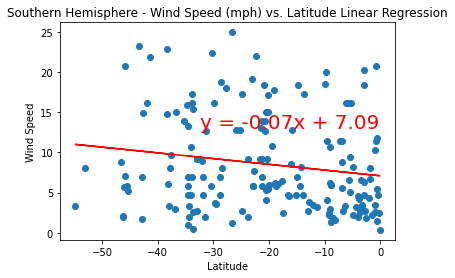

In [57]:
lat = south_hem_df['Lat']
wind = south_hem_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value:", rvalue)

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 150), xycoords = 'figure points', fontsize=20,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

Observation 1: 
Temperature tends to be high when the latitude is low in Northern Hemisphere. The numbers appear to be the opposite in Southern Hemisphere. The temperature tends to be low when the latitude is low in Southern Hemisphere. This means the region that's closer to the equator receives more sunlight, therefore hotter due to the shape of the earth.

Observation 2: 
There is weak correlation between humidity and latitude. It is explained by the slower slope from the both charts and small r-value.

Observation 3: 
There is no strong correlation between wind speend and latitudes. It is explained by the slower slope from the both charts  and small r-value.